<a href="https://colab.research.google.com/github/ougrid/my-knowledge-resource/blob/master/%5B20240107%5D_Coding_for_Data_Science_Day_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Coding for Data Science (Day 2)

##เนื้อหา


*   Function
*   Object oriented programming
*   NumPy
*   Matplotlib
*   Seaborn & Pandas

## หัวข้อที่ 1: ฟังก์ชัน

- ในบางครั้งเราจำเป็นต้องทำกระบวนการบางอย่างซ้ำๆ กัน แต่ว่าเปลี่ยนค่าตัวแปรที่ควบคุมกระบวนการ (ซึ่งเรียกว่า *พารามิเตอร์* – parameter) เหล่านั้นไปตามสถานการณ์ ทำให้เราต้องก็อปปี้แปะโค้ดและแก้โค้ดซ้ำไปซ้ำมา

- การกระทำดังกล่าวอาจก่อข้อผิดพลาด (bug) ได้ในภายหลัง
  - หากเราต้องแก้ไขกระบวนการหนึ่งจุด เราจะต้องไล่ตามไปแก้ไขทุกจุดที่เราก็อปปี้แปะเอาไว้ให้หมด ไม่เช่นนั้นโปรแกรมก็จะทำงานไม่เหมือนกัน ปัญหานี้เรียกว่า *ปัญหาความไม่เป็นหน่วยเดียวกัน* (modularity issue)
  - กระบวนการที่เราก็อปปี้แปะมานั้น มักจะต่อยาวกันเป็นพรืด หากมาอ่านโค้ดเองในภายหลัง ก็อาจจะลืมไปแล้วว่าโค้ดส่วนนี้ทำหน้าที่อะไร ปัญหานี้เรียกว่า *ปัญหาการอ่านโค้ดไม่ออก* (code readability issue)
  - การก็อปปี้แปะโค้ดซ้ำไปซ้ำมา ทำให้ไม่สามารถเรียกตัวเองซ้ำแบบเวียนเกิดได้ ปัญหานี้เรียกว่า *ปัญหาการเรียกตัวเองซ้ำ* (self-callability issue)
  
- เพื่อแก้ปัญหาดังกล่าว เราจะนำกระบวนการที่ต้องทำซ้ำๆ แต่เปลี่ยนค่าตัวแปรที่ควบคุมกระบวนการเหล่านั้น มารวมกลุ่มเป็น<u>**ฟังก์ชัน**</u> (function)

### การนิยามฟังก์ชัน

- เราสามารถนิยามฟังก์ชันได้ด้วยคำสั่ง `def` (ย่อมาจากคำว่า define) ดังนี้ครับ
```python
    def <ชื่อฟังก์ชัน> ( <รายการพารามิเตอร์> ) :
        <กระบวนการ>
```

- เช่น เราสามารถนิยามฟังก์ชันสำหรับรับพารามิเตอร์ ได้แก่ ชื่อนักเรียน อายุ และความสูง แล้วแสดงผลออกหน้าจอ ได้ดังนี้

In [ ]:
def print_student(name, age, height):
    print(f'Name   : {name}')
    print(f'Age    : {age:d} y/o')
    print(f'Height : {height:6.2f} cm')
    print()

- เมื่อเรานิยามฟังก์ชันแล้ว เราก็สามารถเรียกฟังก์ชันนั้นได้

In [ ]:
student_scores = [
    ['John', 13, 165.5], ['Mary', 14, 173.0], ['Cindy', 12, 163.5]
]

for name, age, height in student_scores:
    print_student(name, age, height)

### การคืนค่าจากฟังก์ชันด้วยคำสั่ง `return`

- นอกจากฟังก์ชันจะรวบรวมกระบวนการให้เป็นหน่วยเดียวได้แล้ว เรายังสามารถกำหนดให้ฟังก์ชันทำการคำนวณบางอย่างในกระบวนการ แล้วคืนค่าผลลัพธ์กลับออกมาได้อีกด้วย

- เราสามารถสั่งให้ฟังก์ชันหยุดการทำงานและคืนค่ากลับออกมาได้ด้วยคำสั่ง `return` โดยมีรูปแบบคือ
```python
    return <ค่าที่คืนกลับไป>
```

- เช่น เราสามารถเขียนฟังก์ชันให้คำนวณค่าเฉลี่ย (average) ของสมาชิกในลิสต์ แล้วคืนค่าเฉลี่ยนั้นกลับออกไปได้ดังนี้

In [ ]:
def average(items):
    my_sum = 0.0
    for item in items:
        my_sum = my_sum + item
    return my_sum / len(items)

- เราสามารถนำค่าที่ฟังก์ชันคืนกลับออกมาไปใช้ต่อได้ทันที

In [ ]:
student_heights = [163.5, 150.0, 167.0, 161.25, 170.0]

avg = average(student_heights)

print(f'The average of student heights is {avg:8.2f}.')

### แบบฝึกหัด 1.1


ค่าความแปรปรวน (variance) เป็นมาตรวัดทางสถิติเพื่อบอกว่า ข้อมูลของเรากระจัดกระจายมากแค่ไหน โดยเทียบจากผลรวมของ*ระยะห่าง*ระหว่างข้อมูลแต่ละตัวกับค่าเฉลี่ย ระยะห่างตัวนี้คำนวณได้จากการนำข้อมูลกับค่าเฉลี่ยมาลบกันแล้วยกกำลัง 2 นั่นเอง

จงนิยามฟังก์ชันที่คำนวณค่าความแปรปรวนของข้อมูล $x_1, x_2, x_3, \ldots, x_N$ ซึ่งการคำนวณจะเป็นไปตามสูตรต่อไปนี้

$$
\begin{eqnarray}
\mathrm{Var}(x_1, x_2, x_3, \ldots, x_N) & = & \frac{1}{N - 1} \sum_{k = 1}^{N} \left( x_k - \bar{x} \right)^2
\end{eqnarray}
$$

เมื่อ $\bar{x}$ คือค่าเฉลี่ยของข้อมูล ซึ่งสามารถคำนวณได้จากฟังก์ชัน `average`

<u>**คำเตือน:**</u> เมื่อคำนวณค่าความแปรปรวนได้แล้ว อย่าลืมใช้คำสั่ง `return` เพื่อคืนผลลัพธ์ออกไปด้วยนะครับ

In [ ]:
# ฟังก์ชันสำหรับคำนวณค่าเฉลี่ย
def average(items):
    my_sum = 0.0
    for item in items:
        _________
    return _________

# ฟังก์ชันสำหรับคำนวณค่าความแปรปรวน
def variance(items):
    my_ave = average(items)
    my_sum = 0.0
    for item in items:
        _________
    return _________

เมื่อเขียนโปรแกรมเสร็จแล้ว ท่านสามารถทดสอบโปรแกรมได้ตรงนี้

In [ ]:
student_heights = [163.5, 150.0, 167.0, 161.25, 170.0]

avg = average(student_heights)
var = variance(student_heights)

print(f'The average of student heights is {avg:8.2f}.')
print(f'The variance of student heights is {var:8.2f}.')

#หากโปรแกรมทำงานถูกต้อง
#The average of student heights is   162.35.
#The variance of student heights is    58.80.

### การหยุดการทำงานของฟังก์ชันด้วยคำสั่ง `return`

- เราสามารถหยุดการทำงานของฟังก์ชันกลางคันได้ ด้วยคำสั่ง `return` โดยโปรแกรมจะออกจากฟังก์ชันทันที

- จริงๆ แล้วในคำสั่ง `return` นี้เราอาจจะใส่ค่าที่คืนกลับไปก็ได้ หรือไม่ใส่ลงไปก็ได้
  - หากไม่ใส่ค่าคืนกลับ โปรแกรมก็เพียงหยุดการทำงานของฟังก์ชัน แล้วย้อนกลับไปที่จุดเดิมที่เรียกฟังก์ชันนั้น
  - แต่ถ้าหากใส่ค่าคืนกลับ โปรแกรมก็จะหยุดการทำงานของฟังก์ชัน แล้วย้อนกลับไปที่จุดเดิมพร้อมกับใส่ค่าคืนกลับที่ตำแหน่งของฟังก์ชันนั้น

- เรามาลองสังเกตฟังก์ชันดังต่อไปนี้กัน ฟังก์ชันนี้จะคำนวณค่า factorial ของจำนวนเต็ม $ n $ ซึ่งแทนด้วยสัญลักษณ์ $ n! $ โดยสูตรการคำนวณจะเป็นดังนี้

$$
\begin{eqnarray}
0! & = & 1 \\
1! & = & 1 \\
n! & = & 1 \times 2 \times 3 \times \ldots \times n \qquad \textrm{เมื่อ $n > 1$}
\end{eqnarray}
$$

- หากเราใส่พารามิเตอร์ `n` เป็น 0 หรือ 1 ฟังก์ชันนี้จะคืนค่า 1 ออกไปแล้วหยุดทำงานทันที

In [ ]:
# คำนวณค่า factorial ของจำนวนเต็ม n
def factorial(n):

    # หากค่า n เป็น 0 หรือ 1
    if n in [0, 1]:
        # ให้คืนค่า 1 กลับไป แล้วหยุดการทำงานทันที
        return 1

    # วนลูปคูณเลข
    result = 1.0
    for i in range(2, n + 1):
        result = result * i

    # คืนผลลัพธ์กลับออกไป
    return result

- เรามาลองทดสอบฟังก์ชัน `factorial` กัน

In [ ]:
print(factorial(0))
print(factorial(20))

- ในกรณีที่ฟังก์ชันเป็นเพียงการรวบรวมกระบวนการให้เป็นหน่วย ไม่ได้มีจุดประสงค์จะคืนค่ากลับออกไป เราก็ยังสามารถใช้คำสั่ง `return` ได้ด้วย เพียงแต่เราไม่ต้องระบุค่าคืนกลับเท่านั้นเอง

- ในฟังก์ชันด้านล่างนี้ ถ้าหากพารามิเตอร์ `age` มีค่า 60 ขึ้นไป ฟังก์ชันจะพิมพ์ข้อความ `--Senior--` แล้วจบการทำงานทันที

In [ ]:
def print_student(name, age, height):

    # หาก age มีค่า 60 ขึ้นไป
    if age >= 60:
        print('--Senior--')
        print()

        # หยุดการทำงานของฟังก์ชัน
        return

    print(f'Name   : {name}')
    print(f'Age    : {age:d} y/o')
    print(f'Height : {height:6.2f} cm')
    print()

In [ ]:
student_scores = [
    ['John', 13, 165.5], ['Mary', 14, 173.0], ['Cindy', 12, 163.5],
    ['Magdalene', 65, 165.5], ['Eugene', 15, 177.0], ['Rupert', 12, 153.5]
]

for name, age, height in student_scores:
    print_student(name, age, height)

### แลมบ์ดาฟังก์ชัน (Lambda function)

- แลมบ์ดาฟังก์ชัน หรือ แลมบ์ดาเอ็กเพรสชั่น (Lambda Expression) คืองก์ชันขนาดเล็ก ที่สามารถมีได้เพียงเอ็กเพรสชั่นเดียวเท่านั้น
- เราสามารถใช้คำสั่ง `lambda` ในการสร้างแลมบ์ดาฟังก์ชันได้
- และค่าที่แลมบ์ดาฟังก์ชัน `return` จะเป็นผลลัพธ์ของเอ็กเพรสชั่นของฟังก์ชัน เช่น

In [ ]:
f = lambda x: x + 1
print(f(2))
print(f(8))

In [ ]:
g = lambda a, b: (a + b) / 2
print(g(3, 5))
print(g(10, 33))

- แลมบ์ดาฟังก์ชันจะมีประโยชน์มากเมื่อนำมาใช้กับฟังก์ชัน `filter()` หรือฟังก์ชัน `map()`


- เมื่อ `filter()` คือฟังก์ชันที่สร้างลิสต์ที่ฟังก์ชันภายในคืนค่า `true` โดยมีรูปแบบการใช้งานดังนี้
```
return_lis = list(filter(<ฟังก์ชันที่ใช้ตรวจสอบ>, <ลิสต์ของข้อมูล>))
```
เช่น

In [ ]:
def oddNumber(x):
  return x%2 != 0

my_number = [0,1,2,3,4,5]
print(list(filter(oddNumber,my_number)))

- หากเราใช้แลมบ์ดาฟังก์ชัน จะสามารถเขียนได้ใหม่เป็น

In [ ]:
my_number = [0,1,2,3,4,5]
print(list(filter(lambda x: x%2 != 0,my_number)))

- เมื่อ `map()` คือฟังก์ชันที่นำสมาชิกทุกตัวในลิสต์ไปกระทำโดยฟังก์ชันภายในโดยมีรูปแบบการใช้งานดังนี้
```
return_lis = list(map(<ฟังก์ชันที่จะกระทำ>, <ลิสต์ของข้อมูล>))
```
เช่น

In [ ]:
def power2(x):
  return x**2

my_number = [0,1,2,3,4,5]
print(list(map(power2,my_number)))

- หากเราใช้แลมบ์ดาฟังก์ชัน จะสามารถเขียนได้ใหม่เป็น

In [ ]:
my_number = [0,1,2,3,4,5]
print(list(map(lambda x: x**2,my_number)))

### การใช้งาน list comprehension

- list comprehension คือการสร้าง List ใหม่จาก List เดิมที่มี
- เราสามารถใช้งาน list comprehension ในการทำงานคล้ายกับ map function ได้ ตัวอย่างเช่น

In [ ]:
old_list = [0, 2, 4, 6]
new_list = [x+2 for x in old_list]
print('my old list',old_list)
print('my new list',new_list)

- นอกจากนี้ เรายังสามารถใช้ list comprehension ในการทำงานคล้ายกับ filter function ได้ ตัวอย่างเช่น

In [ ]:
items = [0, 1, 2, 3, 4, 5]
new_items = [x for x in items if x%2 == 0]
print(new_items)

- หรือเรายังสามารถใช้ list comprehension ในการทำงาน map และ filter ในกระบวนการเดียวได้อีกด้วย เช่น

In [ ]:
items = [0, 1, 2, 3, 4, 5]
new_items = [x**2 for x in items if x%2 == 0]
print(new_items)

### แบบฝึกหัด 1.2

จงเขียนโปรแกรมเพื่อคำนวณค่ารากที่สองของข้อมูลที่อยู่ในลิสต์ที่เป็นจำนวนคู่ โดยโปรแกรมจะต้องเขียนอยู่ในฟังก์ชัน `print()` เท่านั้น

In [ ]:
number_list = [2, 15, 5, 7, 10, 3, 28, 30]
print(_______________)

### แบบฝึกหัด 1.3

จงเขียนโปรแกรมที่คำนวณตัวเลข Fibonacci $ F(n) $ ซึ่งเป็นตามนิยามต่อไปนี้
$$
\begin{eqnarray}
    F(n) & = &
    \begin{cases}
        F(n - 1) + F(n - 2) & \textrm{เมื่อ } n \geq 2 \\
        n & \textrm{มิฉะนั้น} \\
    \end{cases}
\end{eqnarray}
$$
แล้วทดลองพิมพ์ค่าของ $F(5)$ ออกมา


- ฟังก์ชันที่เราเขียนใน แบบฝึกหัด 1.3 เราเรียกว่า ฟังก์ชันเวียนเกิด (Recursive function)
- ซึ่งฟังก์ชันดังกล่าวจะประกอบด้วย 2 ส้วนหลักๆ คือ
 - กรณีเวียนเกิด (Recursion case) เป็นกรณีที่ฟังก์ชันจะคืนค่าที่เกิดจากการเรียกใช้ฟังก์ชันตัวเอง
 - กรณีฐาน (Base case) เป็นกรณีสิ้นสุดการเวียนเกิด ซึ่งฟังก์ชันจะทำการคืนค่าคงที่ออกมาก

## หัวข้อที่ 2: การโปรแกรมเชิงวัตถุ


- ในกิจกรรมที่แล้ว เราได้เรียนรู้การรวบรวมกระบวนการให้เป็นหน่วยด้วยฟังก์ชัน นั่นคือเราพยายามออกแบบโปรแกรมโดยเน้นที่กระบวนการของการกระทำ

- แต่ในบางกรณี การออกแบบโปรแกรมโดยเน้นกระบวนการอาจจะทำให้การเขียนโปรแกรมยุ่งยากมากขึ้น

- เช่น เราต้องการเขียนโปรแกรมเพื่อจัดการกับรูปทรงต่างๆ เช่น สามเหลี่ยม สี่เหลี่ยมจัตุรัส ฯลฯ โดยมีการกระทำดังต่อไปนี้
  1. หาพื้นที่ได้
  2. หาเส้นรอบวงได้
  3. หาสีของรูปทรงได้
  4. เปลี่ยนข้อมูลจำเพาะของรูปทรงได้ เช่น รัศมี ความกว้าง ความยาว ฯลฯ
  5. เปลี่ยนสีของรูปทรงได้
  
- ถ้าเราเขียนโปรแกรมด้วยฟังก์ชันทั้งหมด เราจะเขียนโปรแกรมได้ดังนี้

In [ ]:
pi = 3.1415926

# คำนวณพื้นที่วงกลม
def area_circle(circle):
    return pi * circle['radius']**2

# คำนวณเส้นรอบวงของวงกลม
def circumference_circle(circle):
    return 2 * pi * circle['radius']

# หาค่าสีของวงกลม
def color_circle(circle):
    return circle['color']

# คำนวณพื้นที่จัตุรัส
def area_square(square):
    return square['side']**2

# คำนวณเส้นรอบวงจัตุรัส
def circumference_square(square):
    return 4 * square['side']

# หาค่าสีของจัตุรัส
def color_square(square):
    return square['color']


- จะสังเกตได้ว่า เรายังต้องเขียนฟังก์ชันซ้ำกันอยู่หลายอัน แม้ว่าฟังก์ชันเหล่านี้จะทำงานคล้ายคลึงกันก็ตาม เช่น `color_circle` กับ `color_square`

### คลาส (class)

- เพื่อให้อ่านโค้ดได้ง่ายขึ้น เรายังสามารถรวบรวมกระบวนการตามชนิดของวัตถุได้อีกด้วย โดยวัตถุแต่ละชนิดจะมีฟังก์ชันหน้าตาเหมือนกัน แต่ไส้ในของแต่ละฟังก์ชันจะแตกต่างกันไปตามชนิดของวัตถุ

- การรวบรวมกระบวนการตามชนิดของวัตถุนี้ เราเรียกว่า **การโปรแกรมเชิงวัตถุ** (object-oriented programming หรือ OOP)

- ในภาษา Python เราสามารถสร้างวัตถุชนิดใหม่ได้ด้วยคำสั่ง `class` ดังรูปแบบต่อไปนี้
```python
    class <ชื่อคลาส> :
        <รายการฟังก์ชัน>
```

- เราสามารถนิยามฟังก์ชันภายในคลาสได้ด้วยคำสั่ง `def` เหมือนกับฟังก์ชันปกติ แต่ฟังก์ชันภายในคลาสนี้มีชื่อเรียกอย่างเป็นทางการว่า **เมธอด** (method)

- เมธอดสำคัญของคลาสคือ **คอนสตรักเตอร์** (constructor) มีไว้สำหรับสร้างวัตถุ (object) จากคลาส โดยคอนสตรักเตอร์จะใช้ชื่อเมธอดว่า `__init__` (โปรดสังเกตว่าชื่อ `init` จะมีขีดเส้นใต้ 2 อันที่ด้านหน้าและด้านหลัง)

- คอนสตรักเตอร์จะรับพารามิเตอร์ 2 ชุด
  - `self` สำหรับอ้างถึงวัตถุที่เรากำลังจะสร้าง
  - พารามิเตอร์ที่จะใส่ในวัตถุนั้น
  
- เช่น เราสามารถนิยามคลาส `Circle` และคอนสตรักเตอร์ของคลาสนี้ได้ดังนี้

In [ ]:
class Circle:

    def __init__(self, color, radius):
        self.color = color
        self.radius = radius

- คอนสตรักเตอร์ของคลาส `Circle` จะรับพารามิเตอร์สำหรับคลาส 2 ตัวคือ `color` และ `radius`

- เมื่อเรารับพารามิเตอร์เหล่านี้มาแล้ว เราก็จะนำมาใส่เป็น**คุณสมบัติ** (property) ของคลาส โดยเราจะกำหนดคุณสมบัติของคลาสด้วยการอ้างถึงตัวแปร `self` เช่น
```python
    def __init__(self, color, radius):
        self.color = color
        self.radius = radius
```

- นอกจากนี้เรายังสามารถนิยามเมธอดอื่นๆ สำหรับวัตถุของคลาส `Circle` ได้อีกด้วย ในตัวอย่างข้างล่างนี่ เราจะนิยามฟังก์ชันเพิ่มอีก 3 ตัว ได้แก่ `area`, `circumference`, และ `get_color`

In [ ]:
pi = 3.1415926

class Circle:

    # คอนสตรักเตอร์
    def __init__(self, color, radius):

        # กำหนดสีจากพารามิเตอร์
        self.color = color

        # กำหนดรัศมีจากพารามิเตอร์
        self.radius = radius

    # คำนวณพื้นที่
    def area(self):
        return pi * self.radius**2

    # คำนวณเส้นรอบวง
    def circumference(self):
        return 2 * pi * self.radius

    # หาค่าสี
    def get_color(self):
        return self.color

- เราสามารถประกาศวัตถุของคลาสได้โดยเรียกชื่อคลาส ตามด้วยพารามิเตอร์ในคอนสตรักเตอร์

- ในตัวอย่างด้านล่างนี้ เราประกาศวัตถุของคลาส `Circle` ออกมา 3 ตัว

- จริงๆ แล้วการสร้างคลาสเปรียบเสมือนการสร้างแม่พิมพ์ (template) เพื่อสร้างวัตถุจำนวนมากๆ ที่มีหน้าตาคล้ายคลึงกันออกมา

In [ ]:
circle1 = Circle('red', 30.0)
circle2 = Circle('green', 15.5)
circle3 = Circle('blue', 10.0)

- และเราก็สามารถเรียกเมธอดของวัตถุนี้ได้ตามรูปแบบ `<วัตถุ>.<เมธอด>(<พารามิเตอร์>)`

In [ ]:
print('Area of circle1 =', circle1.area())
print('Circumference of circle2 =', circle2.circumference())
print('Color of circle3 =', circle3.get_color())

### การถ่ายทอดคุณสมบัติของคลาส (Inheritance)

- ข้อดีอีกข้อหนึ่งของการสร้างคลาสก็คือ เราสามารถถ่ายทอดคุณสมบัติของคลาสให้กับคลาสลูกหลานได้อีกด้วย

- เช่น ถ้าเราสังเกตคลาส `Circle` และ `Square` ให้ดี เราจะพบว่าทั้งสองคลาสนี้มีคุณสมบัติร่วมกันคือ มี `color` (สี) เหมือนกัน และมีเมธอดร่วมกันคือ `get_color` (หาค่าสี)

- ที่เป็นเช่นนี้ก็เพราะว่า จริงๆ แล้วคลาส `Circle` (วงกลม) และ `Square` (สี่เหลี่ยมจัตุรัส) ต่างก็เป็นรูปทรงด้วยกันทั้งสิ้น เราจึงมองได้ว่าทั้งสองคลาสนี้เป็นคลาสลูกของคลาส `Shape` ด้วยกันทั้งสิ้น

In [ ]:
pi = 3.1415926

class Shape:

    def __init__(self, color):
        self.color = color

    # หาค่าสี
    def get_color(self):
        return self.color

- หากเราต้องการนิยามคลาสใหม่ให้เป็นคลาสลูก เราสามารถใช้คำสั่ง `class` ได้ตามรูปแบบนี้ครับ
```python
    class <คลาสลูก> ( <คลาสแม่> ) :
        <รายการเมธอด>
```

- เมื่อเราประกาศคลาสลูกขึ้นมาแล้ว เราจะต้องนิยามคอนสตรักเตอร์ให้เรียกใช้คอนสตรักเตอร์ของคลาสแม่ด้วย

- วิธีการเรียกใช้คอนสตรักเตอร์ของคลาสแม่คือใช้คำสั่ง `super(<คลาสลูก>, self).__init__(<พารามิเตอร์สำหรับคลาสแม่>)`

- เช่น เราสามารถนิยามคลาส `Circle` ให้เป็นคลาสลูกของ `Shape` ได้ดังนี้

In [ ]:
class Circle(Shape):

    def __init__(self, color, radius):

        # นี่คือวิธีการเรียกคอนสตรักเตอร์ของคลาสแม่ โดยเราจะต้องป้อนพารามิเตอร์ที่จำเป็นสำหรับคลาสแม่เข้าไปด้วย
        super(Circle, self).__init__(color)

        # หลังจากนั้นให้เรากำหนดคุณสมบัติของคลาสลูกตามปกติ
        self.radius = radius

    # คำนวณพื้นที่
    def area(self):
        return pi * self.radius**2

    # คำนวณเส้นรอบวง
    def circumference(self):
        return 2 * pi * self.radius

- จะสังเกตว่า คราวนี้เราจะไม่ต้องนิยามฟังก์ชัน `get_color` อีกแล้ว เพราะฟังก์ชันนี้ได้รับการถ่ายทอดมาจากคลาส `Shape` อยู่แล้วนั่นเอง

In [ ]:
my_circle = Circle('red', 30.0)
print('Area =', my_circle.area())
print('Circumference =', my_circle.circumference())
print('Color =', my_circle.get_color())

### แบบฝึกหัด 2.1

สมมติว่าเราต้องการออกแบบคลาสสำหรับรีโมทคอนโทรล หน้าที่หลักของรีโมทคอนโทรลคือ เปิด/ปิด อุปกรณ์ไฟฟ้า แต่รีโมทคอนโทรลสำหรับอุปกรณ์ไฟฟ้าแต่ละชนิดก็จะมีหน้าที่เฉพาะแตกต่างกันออกไป เช่น

- รีโมทโทรทัศน์ก็จะมีฟังก์ชันสำหรับเปลี่ยนช่อง เพิ่ม/ลดเสียง และปรับสีและความสว่าง

- ในขณะที่รีโมทแอร์ก็จะมีฟังก์ชันในการลด/เพิ่มอุณหภูมิ และปรับการสวิงใบพัด เป็นต้น

ในโจทย์ข้อนี้ เราจะให้ท่านออกแบบคลาสทั้งหมด 3 คลาสด้วยกัน โดยมีคลาสแม่คือคลาสรีโมทคอนโทรล `RemoteControl` และมีคลาสลูกอีก 2 คลาสคือ คลาสรีโมทโทรทัศน์ `TVRemoteControl` และคลาสรีโมทแอร์ `ACRemoteControl`

#### 2.1.1 คลาสแม่ `RemoteControl`
คลาสแม่สามารถเปิดและปิดสวิตช์ได้ โดยจะสลับค่าของคุณสมบัติ `power`

In [ ]:
class RemoteControl:

    def __init__(self):

        # ปิดสวิตช์ของอุปกรณ์ไฟฟ้าไว้ก่อน
        self.power = False

    # สลับสวิตช์เปิด/ปิด
    def toggle_power(self):

        print(f'Toggle power: {self.power} -> ', end='')

        # สลับค่าของคุณสมบัติ power (คำใบ้: คำสั่ง not)
        __________

        print(f'{self.power}')

ทดสอบกันนิดนึงว่า คลาสนี้ใช้ได้หรือเปล่า

In [ ]:
rctrl = RemoteControl()

# ค่าสวิตช์ควรจะสลับไปสลับมา
rctrl.toggle_power()
rctrl.toggle_power()
rctrl.toggle_power()

#### 2.1.2 คลาสลูก `TVRemoteControl`: รีโมทโทรทัศน์
คลาส `TVRemoteControl` จะเปลี่ยนช่องได้ เพิ่มเสียงได้ และลดเสียงได้ โดย

- ช่องจะต้องเป็นจำนวนเต็มตั้งแต่ 1 จนถึง 9

- ระดับเสียงจะมีค่าตั้งแต่ 0 จนถึง 10 หากลดเสียงหรือเพิ่มเสียงจนเกินจากค่านี้ ค่าก็จะไม่เปลี่ยนแปลงอีก

In [ ]:
class TVRemoteControl(RemoteControl):

    def __init__(self):

        # เรียกคอนสตรักเตอร์ของคลาสแม่
        __________

        # กำหนดคุณสมบัติเฉพาะของคลาสลูก
        self.channel = 0
        self.volume = 5

    # เปลี่ยนช่องให้เป็นช่องใหม่ที่กำหนด
    def change_channel(self, new_channel):

        print(f'Change channel: {self.channel} -> ', end='')

        # เปลี่ยนช่อง โดยช่องจะต้องเป็นจำนวนเต็มอยู่ในช่วง 0 ถึง 9 ไม่เช่นนั้นก็จะไม่เปลี่ยนช่อง
        __________

        print(f'{self.channel}')

    # เพิ่มเสียง
    def increase_volume(self):

        print(f'Increase volume: {self.volume} -> ', end='')

        # เพิ่มเสียง โดยค่าระดับเสียงต้องไม่เกิน 10
        __________

        print(f'{self.volume}')

    # ลดเสียง
    def decrease_volume(self):

        print(f'Decrease volume: {self.volume} -> ', end='')

        # ลดเสียง โดยค่าระดับเสียงต้องไม่ต่ำกว่า 0
        __________

        print(f'{self.volume}')

ทดสอบโค้ดกันหน่อย

In [ ]:
tvremote = TVRemoteControl()

# ลองเปลี่ยนช่องตามปกติ
tvremote.change_channel(1)
tvremote.change_channel(2)
print()

# ลองเปลี่ยนช่องที่เป็นไปไม่ได้ ช่องไม่ควรจะเปลี่ยน
tvremote.change_channel(-1)
tvremote.change_channel(11)
print()

# ลองเพิ่มเสียงจนหลุดช่วง ระดับเสียงไม่ควรจะเพิ่มอีก
for i in range(11):
    tvremote.increase_volume()
print()

# ลองลดเสียงไปจนหลุดช่วง ระดับเสียงไม่ควรจะลดอีก
for i in range(11):
    tvremote.decrease_volume()

#### 2.1.3 คลาสลูก `ACRemoteControl`: รีโมทแอร์
คลาส `ACRemoteControl` จะเพิ่มระดับอุณหภูมิได้ ลดระดับอุณหภูมิได้ และเปิด/ปิดการสวิงใบพัดได้ ทั้งนี้อุณหภูมิจะต้องอยู่ในช่วง 15-35 องศาเซลเซียสเท่านั้น

In [ ]:
class ACRemoteControl(RemoteControl):

    def __init__(self):

        # เรียกคอนสตรักเตอร์ของคลาสแม่
        __________

        # กำหนดคุณสมบัติเฉพาะของคลาสลูก
        self.temperature = 25
        self.fan_swing = True

    # เพิ่มอุณหภูมิ
    def increase_temperature(self):

        print(f'Increase temperature: {self.temperature} -> ', end='')

        # เพิ่มอุณหภูมิ โดยค่าระดับเสียงต้องไม่เกิน 35
        __________

        print(f'{self.temperature}')

    # ลดอุณหภูมิ
    def decrease_temperature(self):

        print(f'Decrease temperature: {self.temperature} -> ', end='')

        # ลดอุณหภูมิ โดยค่าระดับเสียงต้องไม่ต่ำกว่า 15
        __________

        print(f'{self.temperature}')

    # สลับการเปิด/ปิดสวิงใบพัด
    def toggle_fan_swing(self):

        print(f'Toggle fan swing: {self.fan_swing} -> ', end='')

        # สลับการเปิด/ปิดสวิงใบพัด (คำใบ้: คำสั่ง not)
        # __________

        print(f'{self.fan_swing}')

ลองทดสอบโค้ดด้านบนดู ว่าทำงานได้หรือเปล่า

In [ ]:
acremote = ACRemoteControl()

# ลองสลับสวิตช์การสวิงพัดลม
acremote.toggle_fan_swing()
acremote.toggle_fan_swing()
acremote.toggle_fan_swing()
print()

# ลองเพิ่มอุณหภูมิจนหลุดช่วง ระดับอุณหภูมิไม่ควรจะเพิ่มอีก
for i in range(12):
    acremote.increase_temperature()
print()

# ลองลดอุณหภูมิไปจนหลุดช่วง ระดับอุณหภูมิไม่ควรจะลดอีก
for i in range(12):
    acremote.decrease_temperature()

## หัวข้อที่ 3: NumPy

- NumPy (Numeric Python) เป็นแพคเกจพื้นฐานที่นิยมใช้ในการคำนวณทางวิทยศาสตร์และคณิตศาสตร์
- NumPy มีความสามารถมากมาย จนแทบจะใกล้เคียงกับ MatLab เลยทีเดียว
- เรามักจะใช้ NumPy ในการจัดการข้อมูลประเภทเวกเตอร์และเมทริกซ์
- ก่อนจะใช้งาน NumPy เราจะต้อง **นำเข้า** หรือ **`import`** แพคเกจของ NumPy เข้ามาเสียก่อน โดย

In [ ]:
import numpy

- เราสามารถตั้งชื่อเล่นให้กับการเรียกใช้งานแพคเกจของ NumPy ได้โดยใช้คำสั่ง `as` เช่น

In [ ]:
import numpy as np

- หลังจากเรานำเข้าแพคเกจ NumPy เรียบร้อยแล้ว เราจะสามารถเรียกใช้งานเมธอดของ NumPy ได้ทันที โดยถ้าหากเราตั้งชื่อเล่นให้กับ NumPy เราจะเรียกเมธอดผ่านชื่อเล่นนั้น
```
np.<เมธอด>
```
- เราสามารถใช้ NumPy ในการสร้างตัวแปรที่เก็บข้อมูลของเวกเตอร์ได้ ด้วยเมธอด
```python
import numpy as np
np.array([1,2,5])
```



- โดยนิยามของเวกเตอร์ คือลำดับของตัวเลขที่เขียนอยู่ในรูป

$$ u =  \begin{pmatrix}u_1\\u_2 \\ \vdots \\u_n\end{pmatrix} $$

- ตัวอย่าง เช่น $$ \begin{pmatrix}1\\2\\5 \end{pmatrix},\begin{pmatrix}-6\\3 \end{pmatrix} $$

- ดังนั้น เราอาจกล่าวได้ว่า เวกเตอร์ ก็คือ `array` หนึ่งมิตินั่นเอง

***ข้อควรระวัง:*** array ใน NumPy ต่างจากการใช้ ลิสต์ ตรงที่ ใน array นั้น จะมีข้อมูลได้เพียงชนิดเดียวเท่านั้น ซึ่งโดยทั่วไปแล้ว จะเก็บข้อมูลจำนวนเต็ม `(int)` หรือจำนวนจริง `(float)`

In [ ]:
import numpy as np

a = np.array([0,1,2,3])   # เวกเตอร์
b = np.array([4,5,6,7])   # อันนี้ก็ เวกเตอร์
print(a)
print(b)

- เราสามารถสร้าง `array` ที่มีขนาดมากกว่าหนึ่งมิติได้
- โดย `array` สองมิติ ก็คือ เมทริดซ์นั่นเอง
- นิยามของเมทริกซ์คือ
$$ A = \begin{pmatrix} a_{1,1}&a_{1,2}& \cdots &a_{1,n}\\
a_{2,1}&a_{2,2}& \cdots &a_{2,n}\\
\vdots&\vdots& \ddots &\vdots\\
a_{n,1}&a_{n,2}& \cdots &a_{n,n}\\
\end{pmatrix} $$

- สำหรับการสร้าง `array` 2 มิติ หรือ เมทริกซ์นั้น เราสามารถทำได้โดย

In [ ]:
import numpy as np
c = np.array([[0,1,2,3],[4,5,6,7]])
print(c)

- การเข้าถึงสมาชิกแต่ละตัวภายใน `NumPy array` เราสามารถทำได้โดยอ้างอิงจาก `index` คล้ายกับลิสต์ เช่น

In [ ]:
print(a[0])
print(b[:2])
print(b[1:])
print(c[1,1])
print(c[1,:])

- นอกจากนี้ เรายังสามารถสร้างเมทริกซ์ ที่สมาชิกทุกตัวเป็น `0` ได้อีกด้วย
- เช่น ในโปรแกรมด้านล่าง เรากำลังจะสร้างเมทริกซ์ที่สมาชิกทุกตัวเป็นเลข `0` โดยมีขนาด 2 แถว 4 หลัก

In [ ]:
import numpy as np
z = np.zeros((2,4))
print(z)

- โดยของที่ใส่อยู่ด้านในวงเล็บ เราเรียกว่า ทูเพิล `(tuple)` โดยทูเพิงนั้นจะมีลักษณะคล้ายลิสต์ ต่างกันที่ที่ใช้วงเล็บ `()` ซึ่งลิสต์จะใช้ `[]` และทูเพิล*ไม่* สามารถทำการแก้ไขค่าภายหลังได้
- นอกจากการสร้างเมทริกซ์ที่สมาชิกทุกตัวเป็นเลข 0 แล้วนั้น เรายังสามารถกำหนดให้สมาชิกทุกตัวเป็นเลขอื่นได้ด้วยโดย

```python
matrix = np.full(<ทูเพิลขนาดของเมทริกซ์>,<เลขที่ต้องการเติม>)
```


In [ ]:
import numpy as np
matrix = np.full((3,4),5)
print(matrix)

- ทั้งนี้ เรายังสามารถสร้างเมทริกซ์ที่สมาชิกทุกตัวเกิดจากการสุ่มได้ด้วย

In [ ]:
import numpy as np
a = np.random.rand(2,2)   # สุ่มตามขนาดที่กำหนด
print(a)
b = np.random.randn(3,3)  # สุ่มตามขนาดที่กำหนด ด้วยการกระจายแบบปกติ
print(b)
c = np.random.randint(0,10,(2,2)) #สุ่มจำนวนเต็ม ค่าตั้งแต่ 0-9 ตามขนาดที่กำหนก
print(c)

- ในบางกรณี เราอาจจำเป็นต้องใช้ **เมทริกซ์เอกลักษณ์** (Identity matrix) ซึ่งเมทริกซ์เอกลักษณ์คือเมทริกซ์จตุรัสที่สมาชิกทุกตัวเป็น 0 ยกเว้นสมาชิกในแนวทะแยงมุม จะมีค่าเป็น 1 เช่น
$$ identity{\_}matrix = \begin{pmatrix} 1&0&\cdots&0\\0&1&\cdots&0\\ \vdots&\vdots&\ddots &\vdots \\0&0&0&1\end{pmatrix} $$
- เราสามารถสร้างเมทริกซ์เอกลักษณ์โดยใช้ `NumPy array` ได้ดังนี้

In [ ]:
import numpy as np
identity = np.identity(5)
print(identity)

- ในการคำนวณทางคณิตศาสตร์ ขนาด และรูปร่างของเวกเตอร์/เมทริกซ์มีความสำคัญต่อการคำนวณ
- เราสามารถแสดงจำนวนมิติ และรูปร่างของ `NumPy array` ได้โดย
- แสดงจำนวนมิติของ `array`
```
<ตัวแปร array>.ndim
```

- แสดงรูปร่างของ `array`
```
<ตัวแปร array>.shape
```



In [ ]:
print('dimension of a',a.ndim)
print('shape of a',a.shape)
print('dimension of b',b.ndim)
print('shape of b',b.shape)
print('dimension of c',c.ndim)
print('shape of c',c.shape)

###แบบฝึกหัด 3.1


1. จงสร้างเวกเตอร์ที่มีสมาชิกจำนวน 5 ตัว โดยสมาชิกแต่ละตัวได้มาจากการสุมจำนวนเต็ม ระหว่าง 5-9

In [ ]:
import numpy as np

vector = _______
print(vector)

2. จงสร้างเมทริกซ์ขนาด `5x5` โดยสมาชิกทุกตัวเป็นเลข 1 ทั้งหมด

In [ ]:
import numpy as np

matrix = _______
print(matrix)

- โดยทั่วไปแล้ว `NumPy array` จะกำหนดชนิดของข้อมูลที่บรรจุอยู่ใน `array` ให้อัตโนมัติ ขึ้นอยู่กับข้อมูลใน `array` นั้น
- อย่างไรก็ตาม เราสามารถกำหนดชนิดของข้อมูลที่อยู่ภายใน `NumPy array` เองได้เช่นกัน โดย
```
matrix = np.array(<list>, <dtype>)
```

In [ ]:
import numpy as np

matrix = np.array([1,2,3], float)
print(matrix)

- จะสังเกตเห็นว่า ถึงแม้ค่าที่เราใส่ในลิสต์เพื่อสร้าง `NumPy array` นั้น จะเป็นจำนวนเต็ม แต่เมื่อเรากำหนดให้ข้อมูลภายใน `NumPy array` เป็นจำนวนจริง `(float)` ข้อมูลใน `matrix` ก็จะมีจุดทศนิยมปรากฏขึ้น

***ข้อควรระวัง*** ในการคำนวณทางคณิตศาสตร์ หากชนิดของข้อมูลใน `NumPy array` ไม่สอดคล้องกัน อาจทำให้โปรแกรมไม่สามารถทำงานได้ จึงควรตรวจสอบให้มั่นใจว่าชนิดของข้อมูลสอดคล้องกัน

#### ตัวกระทำทางคณิตศาสตร์ ด้วย `NumPy array`

- ในหัวข้อลิสต์และลูป หากเราต้องการคำนวณค่าจากสมาชิกในลิสต์ เราจะต้องวนลูปเพื่อเข้าถึงสมาชิกแต่ละตัว
- แต่สำหรับ `NumPy array` เราสามารถใช้ตัวกระทำทางคณิตศาสตร์ได้เลย

In [ ]:
normal_list = [1,2,3,4,5] # หากเป็นลิสต์ทั่วไป
print(normal_list + 3)    # เราไม่สามารถนำมาคำนวณได้โดยตรง โปรแกรมจะเกิดข้อผิดพลาด

In [ ]:
import numpy as np

vect = np.array([1,2,3,4,5]) # หากเป็น NumPy array
print(vect + 3)              # เราสามารถนำมาคำนวณได้เลย

- โดยทั่วไปแล้ว ตัวกระทำทางคณิตศาสตร์ จะดำเนินการกับสมาชิกแต่ละตัวใน `array`
- ตัวกระทำทางคณิตศาสตร์ที่สามารถใช้ได้มีดังต่อไปนี้

|Operator|Description|
|--------|------------|
| +| บวก|
| - |ลบ |
| * | คูณ|
| \ | หาร|
| % | หารเอาเศษ|
| ** | ยกกำลัง|

- เนื่องจากการดำเนินการทางคณิตศาสตร์ จะกระทำกับทุกสมาชิก ดังนั้น ขนาดและรูปร่างของ `NumPy array` จะต้องเท่ากัน

In [ ]:
import numpy as np
a = np.array([[4,4],[6,6]])
b = np.full((2,2),2)
print(a+b)
print(a-b)
print(a*b)
print(a/b)
print(a%b)
print(a**b)

- ถ้าหาก `NumPy array` มีขนาดและรูปร่างไม่เท่ากัน แต่มีจำนวนสมาชิกในแถวเท่ากัน
- การดำเนินการทางคณิตศาสตร์ จะถูกกระจายไปแต่ละแถวของ `NumPy array` ตัวที่มีจำนวนแถวมากกว่า เช่น

In [ ]:
import numpy as np
a = np.array([[2,2],[5,5]])
b = np.full((2,),2)
print(a*b)
print(b+a)

***ดังนั้น*** ก่อนดำเนินการใดๆทางคณิตศาสตร์กับตัวแปร `NumPy array` ควรตรวจสอบว่า อย่างน้อย มีจำนวนสมาชิกในแต่ละแถวเท่ากัน

In [ ]:
import numpy as np
a = np.array([1,2])
b = np.array([[1,1,1],[2,2,2]])
print(a + b) # จำนวนสมาชิกในแต่ละแถวไม่เท่ากัน โปรแกรมจะเกิดข้อผิดพลาด

- จะสังเกตเห็นว่า การใช้ตัวดำเนินการ * (คูณ) ข้างต้น เป็นการดำเนินการกับแต่ละสมาชิก ไม่ได้เป็นการคูณเมทริกซ์แต่อย่างใด
- ซึ่งการคูณเมทริกซ์ เราจะได้ผลลัพธ์ที่ต่างออกไป เช่น
$$
\begin{pmatrix}
1&2\\-1&0\\3&2
\end{pmatrix} \times
\begin{pmatrix}
1&5&2\\-2&0&1
\end{pmatrix}
=
\begin{pmatrix}
-3&5&4\\-1&-5&-2\\-1&15&8
\end{pmatrix}
$$
- ในการคูณเมทริกซฺ เราจะใช้ฟังก์ชัน `dot` ใน `NumPy` เข้ามาช่วย เช่น

In [ ]:
import numpy as np
a = np.array([[1,2],[-1,0],[3,2]])
b = np.array([[1,5,2],[-2,0,1]])
print('a = ')
print(a)
print('b = ')
print(b)
print('a x b = ')
print(np.dot(a,b))

###แบบฝึกหัด 3.2

1. สร้างเมทริกซ์
$$
a = \begin{pmatrix}1&2&1\\0&0&0\\-1&-2&-1\end{pmatrix}\\
b = \begin{pmatrix}1&2&1\\2&4&2\\3&6&3\end{pmatrix}\\
c = \begin{pmatrix}4&2&4\end{pmatrix}
$$


2. หาผลการดำเนินการทางคณิตศาสตร์ $$a+b, a-b, a+c,a-c$$

3. หาผลการคูณแบบเมทริกซ์ ของเมทริกซ์ $a$ และเมทริกซ์ $b$

4. หาผลรวมของสมาชิกทุกตัวภายในเมทริกซ์ $c$

- จะเห็นว่า หากเราต้องการหาผลรวมของสมาชิกทุกตัวภายใน `NumPy array` เราจะต้องวนลูปเพื่อทำการบวก
- แต่ในความเป็นจริง `NumPy` มีฟังก์ชันที่ช่วยให้เราสามารถหาผลรวมของสมาชิกภายใน `NumPy array` ได้โดยง่าย รวมถึงฟังก์ชันช่วยในการดำเนินการอื่นๆอีกมากมาย ดังตาราง

|ชื่อฟังก์ชัน|รายละเอียด|
|---|---|
|sum|  ผลรวม $(\sum)$ |
|prod| ผลคูณ  $(\prod)$|
|mean| ค่าเฉลี่ย  |
|var| ความแปรปรวน $(\sigma)$  |
|std|  ส่วนเบี่ยงเบนมาตรฐาน $(SD)$  |
|max| ค่ามากที่สุด  |
|argmax|  ตำแหน่งของค่ามากที่สุด |
|min|  ค่าน้อยที่สุด |
|argmin|  ตำแหน่งของค่าน้อยที่สุด |

In [ ]:
import numpy as np

a = np.array([2,4,3])

print(f'sum of a = {a.sum()}')
print(f'prod of a = {a.prod()}')
print(f'mean of a = {a.mean()}')
print(f'var of a = {a.var()}')
print(f'std of a = {a.std()}')
print(f'max of a = {a.max()}')
print(f'argmax of a = {a.argmax()}')
print(f'min of a = {a.min()}')
print(f'argmin of a = {a.argmin()}')

- นอกจากนี้ หาก `NumPy array` มีจำนวนมิติมากกว่าหนึ่ง เราสามารถระบุแกน (axis) ของ `array` ที่เราต้องการได้อีกด้วย
- หากไม่ระบุแกน ฟังก์ชันของ `NumPy` จะทำการหาคำตอบจากทุกสมาชิกใน `array`
- การระบุแกน สามารถทำได้โดย เพิ่ม option เข้าไปในฟังก์ชันของ `NumPy` เช่น
```
<NumPy array>.<function>(axis=<แกนที่ต้องการ>)
```
- โดยแกนจะถูกกำหนดดังนี้
$$
\hspace{1cm}axis = 0\\
\hspace{1cm}\downarrow	\\
axis = 1 \rightarrow\begin{pmatrix}
1&1&1\\
2&2&2\\
3&3&3
\end{pmatrix}
$$

In [ ]:
import numpy as np

a = np.array([[1,1,1],[2,2,2],[3,3,3]])
print(f'sum of a in all axis = {a.sum()}')
print(f'sum of a in axis 0 = {a.sum(axis=0)}')
print(f'sum of a in axis 1 = {a.sum(axis=1)}')

- สุดท้ายนี้ `NumPy` ยังมีฟังก์ชันสำหรับการดำเนินการทางคณิตศาสตร์ที่เกี่ยวกับเมทริกซ์เพื่อใชำสำหรับการแก้ปัญหาเกี่ยวกับพีชคณิตเชิงเส้น (Linear algebra) อีกด้วย
- โดยการใช้งานจะต้องเรียกผ่านฟังก์ชัน `linalg`
- ซึ่งฟังก์ชันหลักๆ ที่เรามักจะใช้งานคือ
- `det()` ใช้สำหรับหาดีเทอร์มิแนนต์ (determinant) ของเมทริกซ์
-  `inv()` ใช้สำหรับหาอินเวอร์ส (inverse) ของเมทริกซ์

###การประยุกต์ใช้เมทริกซ์ในการแก้ปัญหาระบบสมการเชิงเส้น

*โจทย์*  
ให้ระบบสมการ
$$
x-2y=3 \hspace{1cm}_\cdots(1)\\
2x+y=1 \hspace{1cm}_\cdots(2)
$$

*วิธีทำ* (โดยวิธีกำจัดตัวแปร)

นำ $2 \times(2)$ จะได้
$$
4x+2y=2 \hspace{1cm}_\cdots(3)
$$
นำ $(1)+(3)$ จะได้
$$
5x=5
$$
ดังนั้น เราจะได้ $x=1$

นำ $x=1$ไปแทนใน $(1)$

จะได้คำตอบเป็น
$$
x=1,y=-1
$$

จากวิธีด้านบน เราสามารถเขียนโปรแกรมเพื่อหาคำตอบของระบบสมการเชิงเส้นได้หรือไม่ ?

ทดลองแก้ระบบสมการเชิงเส้นโดยเมทริกซ์อินเวอร์ส

ขั้นตอน

1. แปลงระบบสมการเชิงเส้นให้อยู่ในรูปสมการเมทริกซ์ เช่น ระบบสมการเชิงเส้น 2 ตัวแปร
$$
a_1x+b_1y=d_1\\
a_2x+b_2y=d_2\\
จะได้เป็น\\
\begin{pmatrix}a_1&b_1\\a_2&b_2\end{pmatrix}\begin{pmatrix}x\\y\end{pmatrix}=\begin{pmatrix}d_1\\d_2\end{pmatrix}\\
ซึ่งจะเขียนแทนด้วย \hspace{1cm}AX=D \hspace{1cm} โดยที่\\
A=\begin{pmatrix}a_1&b_1\\a_2&b_2\end{pmatrix},X=\begin{pmatrix}x\\y\end{pmatrix},D=\begin{pmatrix}d_1\\d_2\end{pmatrix}\\
$$
2. หาอินเวอร์สของเมทริกซ์$A$
 - หากไม่สามารถหาอินเวอร์สของเมทริกซ์ $A$ ได้ $(det(A)=0)$ จะสรุปได้ว่า ***ระบบสมการไม่มีคำตอบ***
 - หากสามารถหาอินเวอร์ของเมทริกซ์ $A$ ได้ ดำเนินการในข้อถัดไป
3. นำอินเวอร์สของเมทริกซ์ $A$ มาคูณทั้งสองข้างของสมการ จะได้
$$
X=A^{-1}D
$$
4. จะได้คำตอบของระบบสมการ


In [ ]:
import numpy as np
#a = np.array([[1,2],[2,4]])
a = np.array([[1,-2],[2,1]])
d = np.array([[3],[1]])
print('ans = ')
if np.linalg.det(a) != 0:
  print(np.dot(np.linalg.inv(a),d))
else:
  print('no answer')


###แบบฝึกหัด 3.3

จงใช้เมทริกซ์อินเวอร์สในการแก้ระบบสมการเชิงเส้นต่อไปนี้
\begin{equation}
\begin{split}
x+z & = 1 \\
2x+y & =2 \\
x-y+z & = 3
\end{split}
\end{equation}

ฟังก์ชันอื่นๆ ที่น่าสนใจใน `NumPy`

| | | | | | |
|---|---|---|---|---|---|
|abc | sign|sqrt|log|log10|exp|
|sin|cos|tan|arcsin|arccos|arctan|
|sinh|cosh|tanh|arcsinh|arccosh|arctanh|
|floor|ceil|rint|pi|e|flattern|



##หัวข้อที่ 4: Matplotlib

- เป็นแพคเกจสที่ใช้สำหรับวาดกราฟแบบต่างๆ
- ต่อยอดมาจาก `NumPy array`
- ลักษณะการใช้งานคล้ายการวาดกราฟบน MATLAB

- ก่อนการใช้งาน Matplotli เราจะต้องทำการนำเข้าแพคเกจก่อน เหมือนกับ NumPy
- โดยทั่วไปแล้ว เราจะใช้เพียงแพคเกจย่อยที่ชื่อ pyplot ใน Matplotlib เท่านั้น
- เรายังคงสามารถตั้งชื่อเล่นให้กับการนำเข้า Matplotlib แพคเกจ pyplot ได้เช่นเดียวกับ NumPy
- โดยทั่วไปมักใช้ชื่อ plt เช่น

In [ ]:
import matplotlib.pyplot as plt

- ในการวาดกราฟ เบื้องต้น เราจะใช้คำสั่ง `plot(<ค่าในแนวแกนนอน>,<ค่าในแนวแกนตั้ง>)`
- และการแสดงผลกราฟที่วาดไว้ เราจะต้องเรียกใช้ฟังก์ชัน `show()` เช่น

In [ ]:
import matplotlib.pyplot as plt
import numpy as np                   # matplotlib มักใช้งานคู่กับ NumPy เสมอๆ

x = np.linspace(0,10,100)            # สร้าง NumPy array โดยมีค่าเริ่มต้นเท่ากับ 0 ค่าสุดท้ายเท่ากับ 10 โดยมีสมาชิกทั้งหมด 100 ตัว
plt.plot(x, np.sin(x))               # วาดกราฟโดยให้แกนนอนเป็นค่า x และแกนตั้งเป็นค่าของ sin(x)

plt.show()                           # แสดงผลกราฟที่วาดไว้

### การวาดกราฟย่อย

- เราสามารถวาดกราฟมากกว่าหนึ่งกราฟได้ โดยการวาดกราฟย่อยลงไปบนกราฟหลัก
- แต่ก่อนอื่น เราจะต้องสร้างกราฟหลักขึ้นมาก่อน โดยใช้ฟังก์ชัน `figure()`
- หลังจากนั้น ทำการวาดกราฟย่อยลงไป ด้วยฟังก์ชัน `subplot()`
- โดยในฟังก์ชัน `subplot()` เราจะต้องกำหนดจำนวนแถว หลัก และตำแหน่งที่ต้องการวาดกราฟลงไปเช่นเดียวกับการใช้งาน MATLAB

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0,10,100)  # สร้าง NumPy array โดยมีค่าเริ่มต้นเท่ากับ 0 ค่าสุดท้ายเท่ากับ 10 โดยมีสมาชิกทั้งหมด 100 ตัว
plt.figure()               # สร้างกราฟหลัก


plt.subplot(2, 1, 1)       # สร้างกราฟย่อยอันแรก โดยกำหนดให้กราฟย่อยมีจำนวน 2 แถว 1 หลัก และกราฟย่อยนี้อยู่ในแถวที่ 1
plt.plot(x, np.sin(x))     # วาดกราฟโดยให้แกนนอนเป็นค่า x และแกนตั้งเป็นค่าของ sin(x)

plt.subplot(2, 1, 2)       # สร้างกราฟย่อยอันที่สอง โดยกำหนดให้กราฟย่อยมีจำนวน 2 แถว 1 หลัก และกราฟย่อยนี้อยู่ในแถวที่ 2
plt.plot(x, np.cos(x))     # วาดกราฟโดยให้แกนนอนเป็นค่า x และแกนตั้งเป็นค่าของ cos(x)

plt.show()                 # แสดงผลกราฟที่วาดไว้

- การอ้างถึงกราฟย่อยในแต่ละกราฟ สำหรับการวาดกราฟแบบ MATLAB เราสามารถสังเกตโปรแกรมด้านล่างได้

In [ ]:
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)),
             fontsize=18, ha='center')
plt.show()

- นอกจากการวาดกราฟแบบ MATLAB แล้ว เรายังสามารถวาดกราฟย่อยได้ด้วยหลักการของการโปรแกรมเชิงวัตถุ
- โดยทำการสร้างวัตถุกราฟย่อย และทำการวาดกราฟลงบนวัตถุนั้น เช่น

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0,10,100)

fig, ax = plt.subplots(2)   # สร้างวัตถุกราฟ โดยมรจำนวน 2 กราฟย่อย

# ทำการเรียกเมธอด plot() เพื่อทำการวาดกราฟ
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x))

plt.show()

- การอ้างถึงกราฟย่อยในแต่ละกราฟ สำหรับการวาดกราฟเชิงวัตถุ เราสามารถสังเกตโปรแกรมด้านล่างได้

In [ ]:
fig, ax = plt.subplots(2, 3)
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)),
                      fontsize=18, ha='center')
plt.show()

- หากเราไม่ได้ทำการสร้างกราฟย่อย ทั้งในรูปแบบของ MATLAB หรือการโปรแกรมเชิงวัตถุ กราฟที่วาด จะซ้อนอยู่ในรูปเดียวกัน เช่น

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0,10,100)
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))

plt.show()

### การกำหนดรูปแบบของกราฟ

- ในแพคเกจของ Matplotlib เรามารถกำหนดรูปแบบของกราฟได้ด้วยฟังก์ชัน `style.use()` เช่น

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 1000)
plt.style.use('seaborn-whitegrid') # ทำการเปลี่ยนรูปแบบของกราฟ

plt.plot(x, np.sin(x))
plt.show()


- Matplotlib ยังมีรูปแบบอื่นๆให้เราใช้อีกมากมาย ลองกดเข้าไปดูได้ที่ [ลิงค์นี้](https://matplotlib.org/3.1.0/gallery/style_sheets/style_sheets_reference.html) แล้วลองเปลี่ยนรูปแบบกราฟในโค้ดด้านบนดู

###การกำหนดรูปแบบและสีของเส้นกราฟ

- กรณีที่เราทำการวาดกราฟหลายๆเส้นลงบนกราฟเดียวกันนั้น การกำหนดสี และรูปแบบของเส้น จะช่วยเพิ่มความเด่นชัดของการอ่านข้อมูลได้
- ในการกำหนดสีของเส้นกราฟ Matplotlib รองรับรูปแบบการกำหนดสีไว้มากมาย โดยกำหนดผ่านพารามิเตอร์ `color` เช่น

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 1000)

plt.plot(x, np.sin(x - 0), color='blue')        # กำหนดสีด้วยชื่อสี
plt.plot(x, np.sin(x - 1), color='g')           # กำหนดสีด้วยชื่อย่อ (rgbcmyk)
plt.plot(x, np.sin(x - 2), color='0.75')        # กำหนดสีในโทนสีเทา โดยมีค่าตั้งแต่ 0 - 1
plt.plot(x, np.sin(x - 3), color='#FFDD44')     # กำหนดสีด้วยรหัสสีเลขฐาน16 (RRGGBB: 00 - FF)
plt.plot(x, np.sin(x - 4), color=(1.0,0.2,0.3)) # กำหนดสีด้วยทูเพิลของรหัสสี RGB โดยมีค่า 0 - 1
plt.plot(x, np.sin(x - 5), color='chartreuse')  # กำหนดสีด้วยชื่อสีในรหัส HTML


- นอกจากสีแล้ว เรายังสามารถกำหนดรูปแบบของเส้นกราฟำด้อีกด้วย
- โดยการกำหนดรูปแบบของเส้นกราฟ เราจะทำผ่านพารามิเตอร์ชื่อ `linestyle`
- ซืึง Matplotlib รองรับการกำหนดรูปแบบของเส้นทั้งที่เป็นชื่อเต็ม และรหัสย่อ เช่น

In [ ]:
plt.plot(x, x + 0, linestyle='solid')
plt.plot(x, x + 1, linestyle='dashed')
plt.plot(x, x + 2, linestyle='dashdot')
plt.plot(x, x + 3, linestyle='dotted')

plt.plot(x, x + 4, linestyle='-')  # solid
plt.plot(x, x + 5, linestyle='--') # dashed
plt.plot(x, x + 6, linestyle='-.') # dashdot
plt.plot(x, x + 7, linestyle=':')  # dotted

- เรายังสามารถกำหนดรูปแบบและสีของเส้นกราฟได้ในเวลาเดียวกัน เช่น

In [ ]:
plt.plot(x, x + 0, '-g')  # solid green
plt.plot(x, x + 1, '--c') # dashed cyan
plt.plot(x, x + 2, '-.k') # dashdot black
plt.plot(x, x + 3, ':r')  # dotted red

###การกำหนดขอบเขตของแกน

- ในการวาดกราฟ บางครั้งเราอาจต้องการแสดงขอบเขตของแกนกว้างกว่า หรือพอดีกับข้อมูลที่เราจะวาด
- เราสามารถกำหนดขอบเขตของแกนได้หลากหลายรูปแบบ เช่น
1. กำหนดผ่านฟังก์ชัน `xlim()` และ `ylim()`

In [ ]:
plt.plot(x, np.sin(x))

plt.xlim(-1, 11)
plt.ylim(-1.5, 1.5)

In [ ]:
plt.plot(x, np.sin(x))

plt.xlim(10, 0)
plt.ylim(1.2, -1.2)

2. กำหนดผ่านฟังก์ชัน `axis()`

In [ ]:
plt.plot(x, np.sin(x))
plt.axis([-1, 11, -1.5, 1.5])

In [ ]:
plt.plot(x, np.sin(x))
plt.axis('tight')

In [ ]:
plt.plot(x, np.sin(x))
plt.axis('equal')

###การตั้งชื่อกราฟ และชื่อแกน

- เราสามารถกำหนดชื่อกราฟ และชื่อของแกนแต่ละแกนได้โดย
1. ฟังก์ชัน `title` เป็นฟังก์ชันที่ใช้สำหรับตั้งชื่อกราฟ
2. ฟังก์ชัน `xlabel()` เป็นฟังก์ชันที่ใช้ตั้งชื่อแกน `x`
3. ฟังก์ชัน `ylabel()` เป็นฟังก์ชันที่ใช้ตั้งชื่อแกน `y`

In [ ]:
plt.plot(x, np.sin(x))
plt.title('A Sine Curve')
plt.xlabel('x')
plt.ylabel('sin(x)')

- นอกจากนั้น เรายังสามารถตั้งชื่อให้กับเส้นกราฟแต่ละเส้นได้อีกด้วย
- โดยการตั้งชื่อเส้นกราฟนั้น เราจะตั้งผ่านพารามิเตอร์ `label` ในฟังก์ชัน `plot()`
- แต่ชื่อของเส้นกราฟจะยังไม่แสดง จนกว่าเราจะเรียกฟังก์ชัน `legend()`
- ซึ่งฟังก์ชัน `legend()` เราจะสามารถระบุตำแหน่งที่จะแสดงข้อมูลของเส้นกราฟได้ผ่านทางพารามิเตอร์ `loc`

In [ ]:
plt.plot(x, np.sin(x), '-g', label='sin(x)')
plt.plot(x, np.cos(x), ':b', label='cos(x)')
plt.axis('equal')

plt.legend()

In [ ]:
plt.plot(x, np.sin(x), '-g', label='sin(x)')
plt.plot(x, np.cos(x), ':b', label='cos(x)')
plt.axis('equal')

plt.legend(loc='lower center')

- พารามิเตอร์ `loc` สามารถตั้งค่าได้ดังนี้

|Location String|Location Code|
|---|:---:|
|'best'|0|
|'upper right'|1|
|'upper left'|2|
|'lower left'|3|
|'lower right'|4|
|'right'|5|
|'center left'|6|
|'center right'|7|
|'lower center'|8|
|'upper center'|9|
|'center'|10|

- ในฟังก์ชัน `legend()` เรายังสามารถระบุจำนวนคอลัมน์ ของการแสดงผลชื่อของเส้นกราฟได้ด้วย ผ่านทางพารามิเตอร์ `ncol` เช่น

In [ ]:
plt.plot(x, np.sin(x), '-g', label='sin(x)')
plt.plot(x, np.cos(x), ':b', label='cos(x)')
plt.axis('equal')

plt.legend(loc='lower center',ncol=2)

### การวาดกราฟแบบกระจัด

- นอกจากการวาดกราฟเส้นแล้ว Matplotlib ยังสามารถวาดกราฟแบบกระจัดได้ด้วย
- โดยการวดกราฟแบบกระจัด สามารถทำได้ผ่านทางฟังก์ชัน `plot()` หรือ `scatter()` ก็ได้

1. การวาดกราฟกระจัดด้วยฟังก์ชัน `plot()`
  - ทำการเปลี่ยนพารามิเตอร์ในฟังก์ชัน `plot()` จาก `linestyle` เป็น `marker`

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 30)
y = np.sin(x)

plt.plot(x, y, 'o', color='black')

  - ซึ่ง `marker` นั้น สามารถมีได้หลายรูปแบบ เช่น

In [ ]:
rng = np.random.RandomState(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.rand(5), rng.rand(5), marker,
             label='marker='{0}''.format(marker))
plt.legend()
plt.xlim(0, 1.8)

- เรายังสามารถวาดกราฟแบบกระจัดโดยมีเส้นเชื่อมได้อีกด้วย เช่น

In [ ]:
plt.plot(x, y, '-o');

- ในฟังก์ชัน `plot()` ยังมีพารามิเตอร์อื่นๆให้เราได้กำหนดอีกมากมาย เช่น

In [ ]:
plt.plot(x, y, '-p',                 # วาดกราฟโดยใช้ marker รูปห้าเหลี่ยม เชื่อมด้วยเส้นทึบ
         color='gray',               # กำหนดสีเส้นกราฟเป็นสีเทา
         markersize=15,              # กำหนดขนาดของ marker
         linewidth=4,                # กำหนดความกว้างของเส้นกราฟ
         markerfacecolor='white',    # กำหนดสีของ marker
         markeredgecolor='gray',     # กำหนดสีของขอบ marker
         markeredgewidth=2)          # กำหนดความกว้างของเส้นขอบ marker
plt.ylim(-1.2, 1.2)

2. วาดกราฟกระจัดด้วยฟังก์ชัน `scatter()`

In [ ]:
plt.scatter(x, y, marker='o')

- การใช้งานฟังก์ชัน `scatter()` คล้ายกับการใช้ฟังก์ชัน `plot()` เพียงแต่เราไม่สามารถลากเส้นเชื่อมแต่ละจุดได้
- ในฟังก์ชัน `scatter()` ก็มีพารามิเตอร์ที่เรากำหนดเองได้คล้ายกับฟังก์ชัน `plot()` เช่น `size, face color, edge color` และอื่นๆอีกมากมาย

In [ ]:
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
            cmap='viridis')
plt.colorbar()

- ในโปรแกรมด้านบน เรามีพารามิเตอร์และการใช้งานฟังก์ชันเพิ่มเติมดังนี้
 - `color` ใช้กำหนดสีของจุด
  - `size` ฬช้กำหนดขนาดของจุด
  - `alpha` ใช้กำหนดความโปร่งแสงของจุด
  - `cmap` ใช้กำหนดตารางสี เราสามารถเลือกตารางสีได้ที่ [ลิงค์ตารางสี](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html)
  - `colorbar()` ให้โปรแกรมแสดงตารางสี

###การวาดกราฟสามมิติ

- โดยทั่วไปแล้ว Matplotlib รองรับการวาดกราฟเฉพาะสองมิติเท่านั้น
- ฉะนั้น หากเราต้องการวาดกราฟสามมิติ เราจะต้องนำเข้าเครื่องมือเพิ่มเติม
- เครื่องมือ `(toolkit)` นั้นชื่อว่า `mplot3d` ซึ่งเป็นเครื่องมือที่สร้างมาจากพื้นฐาน `Matplotlib` อีกทีหนึ่ง
- ดังนั้น ก่อนการวาดกราฟสามมิติ เราจะต้องนำเข้าเครื่องมือ ดังโปรแกรมต่อไปนี้

In [ ]:
from mpl_toolkits import mplot3d

- หลังจากนำเข้าเครื่องมือแล้ว เราจะสามารถสร้างกราฟสามมิติได้ดังนี้

In [ ]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')

- หลังจากที่เราทำการสร้างกราฟ ซึ่งมีลักษณะแกนเป็นสามมิติแล้ว เราจะสามารถทำการวดกราฟลงไปได้
- โดยการวาดกราฟสามมิตินั้น เราจะเรียกผ่านฟังก์ชัน `plot3D()` เช่น

In [ ]:
import numpy as np
ax = plt.axes(projection='3d')

zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

- เรายังสามารถวาดกราฟกระจัดบนแกนสามมิติได้อีกด้วย
- โดยการเรียกฟังก์ชัน `scatter3D()`

In [ ]:
ax = plt.axes(projection='3d')
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

- การวาดกราฟทั้งแบบเส้น และแบบกระจัด สามารถวาดลงบนแกนเดียวกันก็ได้

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')

zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

- เราสามารถกำหนดมุมมองเริ่มต้นของกราฟสามมิติได้โดย กำหนดผ่านฟังก์ชัน `view_init()`

In [ ]:
ax.view_init(60, 35)
fig

- ฟังก์ชัน `view_init()` รับพารามิเตอร์ 2 ตัว คือ
 - `elev` คือ องศาการมองในระนาบ `x-y` มีหน่วยเป็นดีกรี
 - `azim` คือ องศาการหมุนรอบแกน `z` มีหน่วยเป็นดีกรี

- นอกจากการวาดกราฟเส้น และกราฟกระจัดลงบนแกรสามมิติแล้ว เรายังสามารถวาดกราฟแบบอื่นๆำด้อีกด้วย เช่น
 - กราฟเส้นโครงร่าง
 - กราฟเส้นโครงกรอบ
 - กราฟพื้นผิว

In [ ]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z, color='black')
ax.set_title('wireframe');

In [ ]:
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z,
                cmap='viridis', edgecolor='none')
ax.set_title('surface');

## หัวข้อที่ 5: Seaborn & Pandas

### Pandas

- `Pandas` เป็นแพคเกจที่สร้างบนพื้นฐาน `NumPy`
- `Pandas` มาจาก `Panel Data` ไม่ได้เกี่ยวอะไรกับหมีแพนด้า
- `Pandas` มีแพคเกจย่อยที่น่าสนใจคือ `DataFrame`
- `DataFrame` ช่วยให้เราสามารถจัดการกับข้อมูลได้ง่ายขึ้น
- ก่อนการใช้งาน เช่นเคย เราจะต้องนำเข้าแพคเกจของ `Pandas` ซึ่งมักจะนิยมตั้งชื่อเล่นว่า `pd`

In [ ]:
import pandas as pd

### Seaborn

- `Seaborn` เป็นแพคเกจที่ใช้ในการวาดกราฟเช่นเดียวกับ `Matplotlib`
- ซึ่งตัว `Seaborn` เอง จริงๆแล้วก็พัฒนามาจาก `Matplotlib` อีกทีหนึ่ง
- เพียงแต่การทำงานของ `Seaborn` จะทำในลักษณะ `High Level`
- ซึ่งจะช่วยให้เราวาดกราฟเปรียบเทียบข้อมูลต่างๆได้ง่ายขึ้น
- โดยส่วนใหญ่แล้ว เรามักจะใช้ `Seaborn` ในการวาดกราฟของข้อมูลใรแพคเกจย่อย `DataFrame` ซึ่งอยู่ในแพคเกจ `Pandas`
- แน่นอนว่า การใช้งาน `Seaborn` เราจะต้องทำการนำเข้าแพคเกจก่อน และเรามักจะตั้งชื่อเล่นให้มันว่า sns

In [ ]:
import seaborn as sns

- ใน `Seaborn` มีชุดข้อมูลที่มันจะนำมาใช้ในการทดลองเขียนโปรแกรมเกี่ยวกับ `Data Science` และ `AI`
- โดยเราสามารถดาวน์โหลดชุดข้อมูลได้ผ่านทางฟังก์ชัน `load_dataset`
- ในการเรียกฟังก์ชัน `load_dataset` จำเป็นจะต้องทำการเชื่อมต่ออินเตอร์เนต เนื่องจากเป็นการดาวน์โหลดข้อมูลออนไลน์
- เราสามารถตรวจสอบ `dataset` ที่มีอยู่ได้ผ่านทาง [dataset](https://github.com/mwaskom/seaborn-data)


In [ ]:
# ดาวน์โหลด dataset ชื่อ iris
iris = sns.load_dataset('iris')

ชุดข้อมูล `Iris` เป็นชุดข้อมูลของดอก Iris

ชุดข้อมูลนี้ประกอบด้วย:

1. `sepal length`: ความยาวของ sepal ในหน่วยซม.
2. `sepal width`: ความกว้างของ sepal ในหน่วยซม.
3. `petal length`: ความยาวของ petal ในหน่วยซม.
4. `petal width`: ความกว้างของ petal ในหน่วยซม.
5. `species`: ชนิดของ iris ซึ่งมี 3 ชนิด ได้แก่ Setosa, Versicolour, และ Virginica

ชุดข้อมูลนี้มีทั้งหมด 150 ตัวอย่าง

- เมื่อเราทำการตรวจสอบชนิดของตัวแปร จะเห็นว่า เป็นตัวแปรประเภท `DataFrame`

In [ ]:
type(iris)

### Seaborn with Pandas

- เราสามารถกรองข้อมูลประเภท `DataFrame` ได้โดยง่าย ผ่านฟังก์ชัน `loc()` เช่น

In [ ]:
iris.loc[iris['species']=='setosa']

- ฟังก์ชันที่ใช้ในการวาดกราฟของ `Seaborn` มีมากมาย เราจะยกตัวอย่างฟังก์ชันที่น่าสนใจคือ
 - `pairplot()`
 - `catplot()`

- `pairplot` เป็นการวาดกราฟโดยจับคู่ข้อมูลในทุกความน่าจะเป็น เช่น
 - ในชุดข้อมูล `iris` มีข้อมูลทั้งหมด 5 คอลัมน์
 - หากเราเลือกข้อมูล 1 คอลัมน์ มาเป็นข้อมูลในการแสดงผล เราจะเหลือข้อมูล 4 คอลัมน์
 - `pairplot` จะนำข้อมูลที่เหลือทั้ง 4 คอลัมน์ มาจับคู่วาดกราฟ
 - ฉะนั้น เราจะได้กราฟทั้งหมด 16 แบบ โดยมีกราฟที่จับคู่คอลัมน์ของตัวเองรวมอยู่ด้วย
 - เช่น เราต้องการวาดกราฟโดยแยกตาม `species` เราจะได้

In [ ]:
sns.pairplot(iris, hue='species', height=3)

- โดยพารามิเตอร์แรกที่เรากำหนดในฟังก์ชัน คือชุดของข้อมูล ที่มีชนิดข้อมูลเป็น `DataFrame`
- พารามิเตอร์ `hue` ตือชื่อคอลัมน์ที่เราต้องการนำมาแสดงผล
- `height` คือความสูงของกราฟแต่ละอัน

- `catplot` เป็นฟังก์ชันที่ใช้ในการวาดกราฟโดยมุ่งเน้นที่ความสัมพันธ์ของข้อมูล หรือการแบ่งกลุ่มข้อมูล
- ในการยกตัวอย่างการใช้งานฟังก์ชัน `catplot` เราจะนำเข้าชุดข้อมูลที่ชื่อ `planets`

In [ ]:
planets = sns.load_dataset('planets')
planets

- เราจะทำการวาดกราฟ โดยนับจำนวนข้อมูลแยกตามปี

In [ ]:
sns.catplot('year', data=planets,kind='count', color='steelblue',aspect=3)

###แบบฝึกหัด 5.1

1. ดาวน์โหลดข้อมูลจาก `Seaborn dataset` ที่ชื่อว่า `tips`

ชุดข้อมูล `tips` เป็นชุดข้อมูลพนักงานเสิร์ฟในร้านอาหาร

 ข้อมูลที่รวบรวมไว้ประกอบด้วย:

1.  `total_bill`: ราคาต่อใบเสร็จ (usd)
2.  `tip`: ทิป (usd)
3. `sex`: เพศของผู้ชำระเงิน
4. `smoker`: มีคนสูบบุหรี่หรือไม่
5. `day`: วันของสัปดาห์
6. `time`: มื้อที่ทาน
7. `size`: จำนวนผู้ร่วมโต๊ะ

ชุดข้อมูลนี้มีทั้งหมด 244 รายการ

2. กรองข้อมูลเฉพาะค่า `tip` มากกว่า 5

3. วาดกราฟแสดงความสัมพันธ์ระหว่างจำนวนครั้งที่ได้ทิปในแต่ละช่วงเวลา

4. วาดกราฟแสดงความสัมพันธ์ระหว่างจำนวนครั้งที่ได้ทิปของผู้หญิงและผู้ชาย

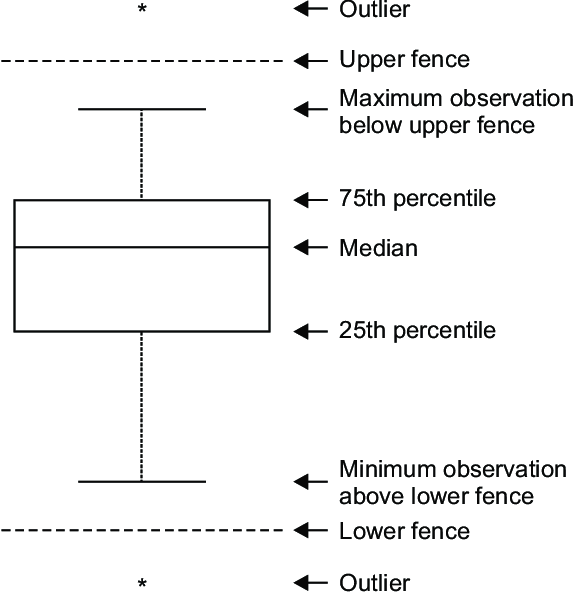### More about Pandas Dataframe

#### Import/Export csv ด้วย Pandas

เราสามารถใช้คำสั่ง `pd.read_csv` ในการอ่าน csv ไฟล์ และใช้คำสั่ง `.to_csv()` ในการเขียนไฟล์ csv ได้ดังตัวอย่าง

In [ ]:
import pandas as pd

df = pd.read_csv('penguins.csv')

df.head()

In [ ]:
df.to_csv('penguins_modify')

#### Data Preview

เราสามารถแสดงข้อมูลใน Dataframe บางส่วนด้วยคำสั่ง


*   `.head()` เป็นการแสดงข้อมูลจากหัวตาราง โดยเราสามารถระบุจำนวนที่ต้องการแสดงได้
*   `.tail()` เป็นการแสดงข้อมูลจากท้ายตาราง โดยเราสามารถระบุจำนวนที่ต้องการแสดงได้



In [ ]:
import pandas as pd
import seaborn as sns

df = sns.load_dataset('penguins')

ชุดข้อมูล `penguins` เป็นชุดข้อมูลที่มีข้อมูลทางกายวิภาคของเพนกวิน 3 ชนิด ได้แก่ Adelie, Gentoo, และ Chinstrap

 ข้อมูลที่รวบรวมไว้ประกอบด้วย:



1.  `species`: ชนิดของเพนกวิน (Chinstrap, Adélie, หรือ Gentoo)
2.  `island`: ชื่อเกาะ (Dream, Torgersen, หรือ Biscoe) ใน Palmer Archipelago (Antarctica)
3. `bill_length_mm`: ความยาวของจะงอยปาก (มิลลิเมตร)
4. `bill_depth_mm`: ความลึกของจะงอยปาก (มิลลิเมตร)
5. `flipper_length_mm`: ความยาวของปีก (มิลลิเมตร)
6. `body_mass_g`: น้ำหนักตัว (กรัม)
7. `sex`: เพศของเพนกวิน

ชุดข้อมูลนี้มีทั้งหมด 344 รายการ

In [ ]:
df.head()

In [ ]:
df.tail()

นอกจากนี้ เรายังสามารถแสดงข้อมูลของ Dataframe อื่นๆได้อีกด้วย เช่น

* `.shape` จะเป็นการแสดงจำนวนข้อมูลแยกตามมิติ

In [ ]:
df.shape

* `.info()` เป็นการแสดง Information ของ Dataframe

In [ ]:
df.info()

* `.dtype` เป็นการตรวจสอบชนิดของข้อมูลในแต่ละ column

In [ ]:
df.dtypes

* `.describe()` เป็นการแสดงข้อมูลทางสถิติเบื้องต้น

In [ ]:
df.describe()

* `.unique()` เป็นการแสดงข้อมูลที่ไม่ซ้ำกัน โดยจะต้องระบุชื่อ column ที่ต้องการแสดงผล

In [ ]:
df['island'].unique()

#### Data Cleaning

เราสามารถนับจำนวนข้อมูลที่เป็นช่องว่าง หรือ `null` ได้โดย `.isnull().sum()`

In [ ]:
df.isnull().sum()

เราสามารถใช้คำสั่ง `.dropna()` เพื่อลบข้อมูลทั้งแถว ที่มีข้อมูลเป็น `null`

In [ ]:
df_clean = df.dropna()

df_clean.info()

เมื่อเราทำการลบข้อมูลไปแล้ว อาจทำให้ `index` ของข้อมูลไม่เรียงตามที่ควรจะเป็น เราสามารถจัดเรียง `index` ใหม่ได้โดยใช้คำสั่ง `.resetindex()`

In [ ]:
df_clean.head()

In [ ]:
df_clean = df_clean.reset_index(drop=True)
df_clean.head()

In [ ]:
df_clean.isnull().sum()

นอกจากนี้ เรายังสามารถเติมข้อมูลที่ขาดหายไปได้อีกด้วย โดยใช้คำสั่ง `.fillna()`

In [ ]:
df_fill = df.fillna(0)
df_fill.head(20)

เรายะงสามารถเพิ่ม parameter `method` ในการ `fill` ได้

* `bfill` เติมข้อมูลด้วยข้อมูลถัดไป
* `ffill` เติมข้อมูลด้วยข้อมูลก่อนหน้า

In [ ]:
df_bfill = df.fillna(method='bfill')
df_bfill.head(20)

In [ ]:
df_ffill = df.fillna(method='ffill')
df_ffill.head(20)

#### Data Filtering

เราสามารถเลือกข้อมูลที่ต้องการด้วยวิธี `.iloc` และ `.loc`

In [ ]:
df.iloc[0]

In [ ]:
df.loc[df['sex'] == 'Female']

In [ ]:
df.loc[df['flipper_length_mm'] > 200]

In [ ]:
df.loc[(df['sex'] == 'Female') & (df['body_mass_g'] > 4000)]

เราสามารถใช้คำสั่ง `.sort_values()` ในการเรียงลำดับข้อมูล

In [ ]:
df.sort_values(by='flipper_length_mm', ascending=False)

###แบบฝึกหัด 5.2

จากข้อมูล dataset Titanic

1. `survived`: (0= No, 1=Yes)
2. `pclass`: The passenger class (1=1st, 2=2nd, 3=3rd)
3. `sex`: The gender of the passenger
4. `age`: The age of the passenger
5. `sibsp`: The number of siblings/spouses aboard
6. `parch`: The number of parents/children aboard
7. `fare`: The passengers fare cost
8. `embarked`: The port where the passenger embarked from (C=Cherbourg, Q=Queenstown, S=Southhampton)
9. `class`: The passenger class as a string (First, Second, Third)
10. `who`: A string that indicates if the passenger is a man, woman, or child
11. ` adult_male`: A boolean value indicating if the passenger is an adult male
12. `deck`: The deck of the ship where the passenger’s cabin was located
13. `embark_town`: The port where the passenger embarked from
14.  `alive`: A string indicating if the passenger survived or not (yes, no)
15. `alone`: A boolean value indicating if the passenger was alone or not


In [ ]:
import seaborn as sns
import pandas as pd

titanic = sns.load_dataset('titanic')
titanic.info()

1. ทำการ clean ข้อมูล

คำใบ้: มีข้อมูลอยู่ 1 column ที่อาจจะต้องลบทิ้ง ลองค้นหาคำว่า `dataframe drop column`

2. นับจำนวนผู้รอดชีวิต และผู้เสียชีวิต

คำใบ้: ลองค้นหาคำว่า `dataframe value_counts`

3. นับจำนวนผู้เสียชีวิต แยกตาม ผู้ชาย ผู้หณิง และ เด็ก

### More about Seaborn

In [ ]:
import seaborn as sns
import pandas as pd

data = sns.load_dataset('penguins')

data.info()

In [ ]:
data = data.dropna()

data.reset_index(drop=True)

In [ ]:
columns = data.columns.values.tolist()

for column in columns:
  print(data[column].unique())

####Pie Chart using pandas `series.plot()`

[Pandas Series Plot](https://pandas.pydata.org/docs/reference/api/pandas.Series.plot.html)

[Matplotlib Pyplot Pie](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html)

In [ ]:
species = data.species.value_counts()
print(species)

In [ ]:
type(species)

In [ ]:
species.plot(kind='pie', autopct='%.2f%%')

####แบบฝึกหัด 5.3

ทำการวาด pie chart ของข้อมูลต่อไปนี้

1. island

2. sex

#### Scatter Plot

กราฟแบบ scatter plot ใช้เพื่อแสดงความสัมพันธ์ระหว่างตัวแปร โดยแสดงผลเป็นจุดข้อมูล

[Seaborn Scatter Plot](https://seaborn.pydata.org/generated/seaborn.scatterplot.html)

In [ ]:
sns.scatterplot(x='bill_length_mm', y='bill_depth_mm', data=data, hue='species')

# plt.title('Bill Length vs Bill Depth', size=20, color='red')

####Histogram

กราฟแบบ histogram แสดงการกระจายของข้อมูล เราสามารถใช้กราฟแบบ histogram เพื่อดูการกระจายของตัวแปรหนึ่งหรือมากกว่า

[Seaborn Histogram Plot](https://seaborn.pydata.org/generated/seaborn.histplot.html)

In [ ]:
sns.histplot(x ='flipper_length_mm', data=data)
# plt.title('Flipper Length', size=20, color='red')

เราสามารถกำหนดความกว้างของ bin ได้ โดยทำผ่าน parameter `binwidth`

In [ ]:
sns.histplot(x = 'flipper_length_mm', data = data, binwidth=3)
plt.title('Flipper Length', size=20, color='red')

นอกจากนี้ เรายังสามารถเพิ่มเส้นการกระจายความน่าจะเป็นลงในกราฟำด้โดยผ่าน parameter `kde`

In [ ]:
sns.histplot(x = 'flipper_length_mm', data = data, kde = True)
plt.title('Flipper Length', size=20, color='red')

เราสามารถแสดงข้อมูลของแต่ละ species โดยแยกตามสีได้ผ่าน parameter `hue`

In [ ]:
sns.histplot(x = "flipper_length_mm", data = data, hue = "species")
plt.title("Flipper Length", size=20, color="red")

####Bar Plot

กราฟแท่ง (Bar Plot) เป็นการแสดงข้อมูลค่าแนวโน้มเข้าสู่ศูนย์กลาง (central tendency)

[Seaborn Bar Plot](https://seaborn.pydata.org/generated/seaborn.barplot.html)

In [ ]:
sns.barplot(x ="species", y="flipper_length_mm", data=data)
plt.title("Flipper Length for 3 Penguin Species", size=20, color="red")

เราสามารถแสดงข้อมูลของแต่ละ sex โดยแยกตามสีได้ผ่าน parameter `hue`

In [ ]:
sns.barplot(x = "species", y = "flipper_length_mm", data =data, hue = "sex")
plt.title("Flipper Length for 3 Penguin Species by Sex", size=20, color="red")

#### Box Plot

กราฟกล่อง (box or box-and-whisker plot) แสดงการกระจายของข้อมูลเชิงปริมาณในการเปรียบเทียบระหว่างตัวแปรหรือข้ามระดับของตัวแปรหมวดหมู่ box จะแสดงควอร์ไทล์ของชุดข้อมูลในขณะที่ whisker แสดงการแจกแจงส่วนที่เหลือ ยกเว้นจุดที่กำหนดให้เป็น "ค่าผิดปกติ" (outliers)

![](https://drive.google.com/uc?export=view&id=1XG8pO_D6mld9-rE83U5pwaN02d60ratQ)

In [ ]:
sns.boxplot(x = "species", y = "flipper_length_mm", data =data)
plt.title("Flipper Length for 3 Penguin Species", size=20, color="red")

In [ ]:
sns.boxplot(x = "species", y = "flipper_length_mm", data =data, hue = "sex")
plt.title("Flipper Length for 3 Penguin Species by Sex", size=20, color="red")

####Facet Plot

เป็น Class ที่ใช้ในการวาดกราฟย่อยๆ ตามระดับของข้อมูลที่กำหนด

[Seaborn Facet Plot](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html)

In [ ]:
sns.FacetGrid(data, col="island", row="sex").map(sns.histplot, "flipper_length_mm")

####Pair Plot
เราสามารถใช้ pairplot เพื่อดูความสัมพันธ์ของคู่ตัวแปร ฟังก์ชันนี้สร้าง cross-plots สำหรับแต่ละตัวแปรตัวเลขในชุดข้อมูล

[Seaborn Pair Plot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

In [ ]:
sns.pairplot(data, hue = "species", height=3)

เราสามารถใช้พารามิเตอร์ `diag_kind` เพื่อสร้าง histogram บนแกนแทยง

In [ ]:
sns.pairplot(data, hue = "species", height=3, diag_kind="hist")

#### Heatmap

เราสามารถใช้ heatmap ในการแสดงความสัมพันธ์ของข้อมูล (corelations)

[Seaborn Heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

In [ ]:
sns.heatmap(data.corr(), annot = True)

###แบบฝึกหัด 5.4

จากข้อมูล dataset Titanic เราสามารถวาดกราฟแบบใด และสรุปข้อมูลอะไรจากกราฟต่างๆได้บ้าง

In [ ]:
import seaborn as sns
import pandas as pd

titanic = sns.load_dataset('titanic')
titanic.info()

อย่าลืม!!!  Clean Data ก่อนการใช้งาน